<a href="https://colab.research.google.com/github/PauloGBPonte/DK-MercadoFinanceiro/blob/main/MercadoFinanceiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dados para download
Base_Dados_Nesse_Link = 'https://docs.google.com/spreadsheets/d/1r0_Vs5QX1ef5X1MZCbDg8kcqm-my3rSn/edit?usp=sharing&ouid=108903987275959757465&rtpof=true&sd=true'

print('Dados salvo no Google Driver')
print( Base_Dados_Nesse_Link )

Dados salvo no Google Driver
https://docs.google.com/spreadsheets/d/1r0_Vs5QX1ef5X1MZCbDg8kcqm-my3rSn/edit?usp=sharing&ouid=108903987275959757465&rtpof=true&sd=true


In [ ]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Leitura dos dados
base_dados = pd.read_excel('/content/drive/MyDrive/Vase_004 - Magalu - Sem Resolução.xlsx')
# Verificação
base_dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


## Entendimento da natureza dos dados

In [ ]:
base_dados.shape

(247, 7)

In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [ ]:
base_dados.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,2021-07-02 21:28:25.263158016,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
min,2021-01-04 00:00:00,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,2021-04-05 12:00:00,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,2021-07-02 00:00:00,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,2021-09-29 12:00:00,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,2021-12-30 00:00:00,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984
std,NaN,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316


## Criando serie temporal simples para verificar a variação de valores por periodo de tempo

In [ ]:
# Series Temporais

dados = base_dados.set_index('Data')
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


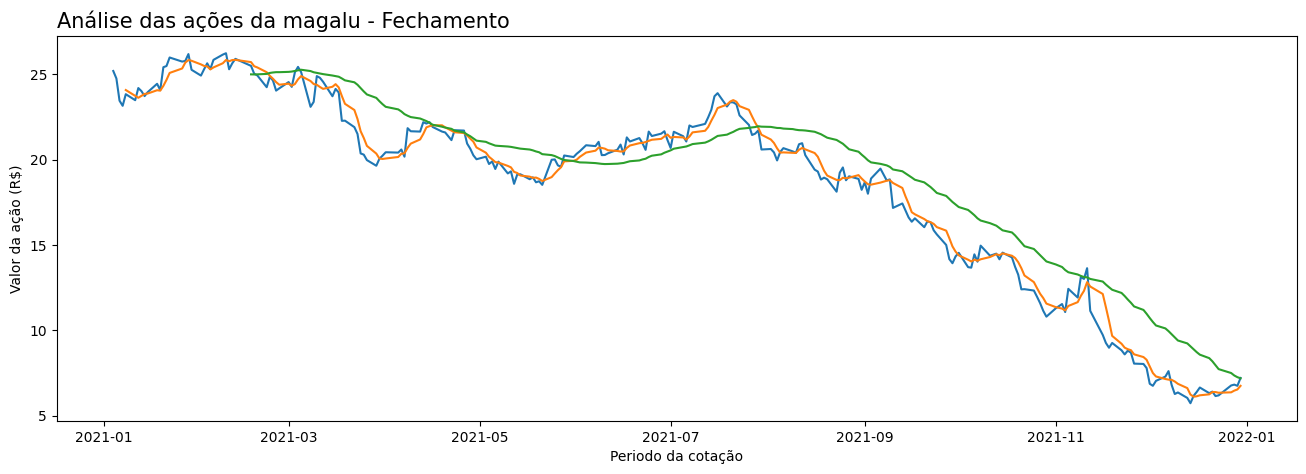

In [ ]:
media_movel = dados['Fechamento'].rolling(5).mean()
media_tendencia = dados['Fechamento'].rolling(30).mean()

plt.figure(figsize=(16, 5))
plt.title("Análise das ações da magalu - Fechamento", fontsize=15, loc='left')


plt.plot(dados.index, dados['Fechamento'])
plt.plot(dados.index, media_movel)
plt.plot(dados.index, media_tendencia)

plt.xlabel('Periodo da cotação')
plt.ylabel('Valor da ação (R$)')

plt.show()

<Axes: xlabel='Fechamento'>

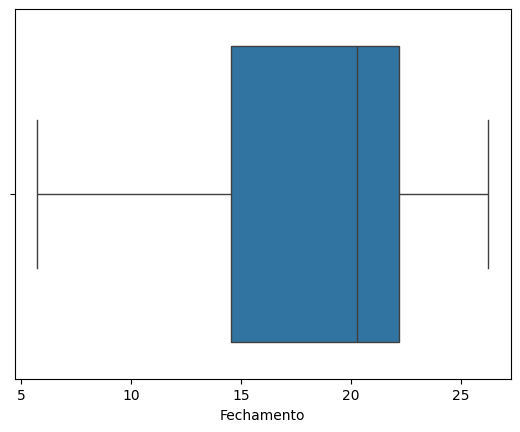

In [ ]:
sns.boxplot(data=dados, x='Fechamento')

<Axes: xlabel='Mes', ylabel='Fechamento'>

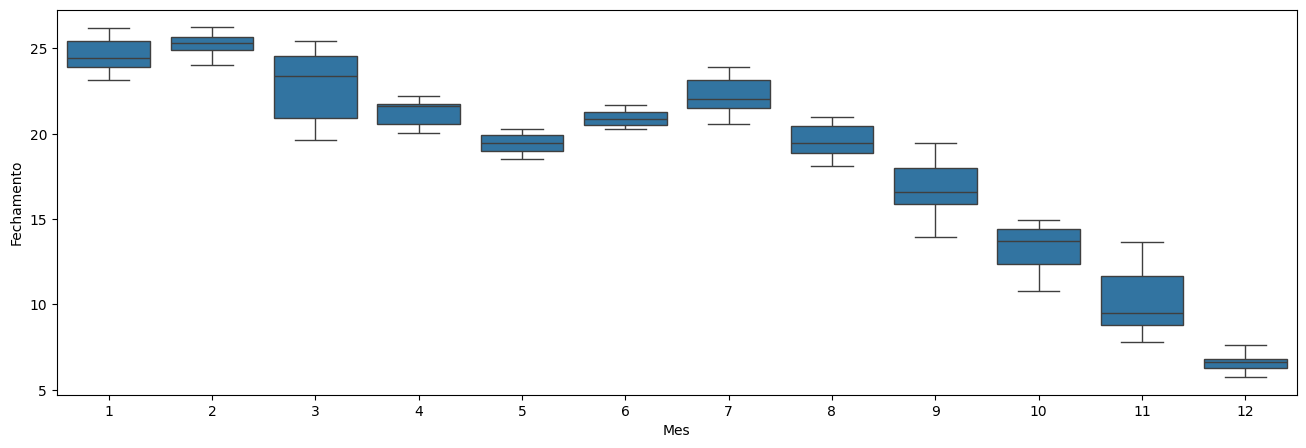

In [ ]:
# Boxplot mensal
base_dados['Mes'] = base_dados['Data'].dt.month

plt.figure(figsize=(16, 5))
sns.boxplot(data = base_dados, x = 'Mes', y = 'Fechamento')

## Utilizando gráfico de velas para acompanhar decida e subida de valores a cada mês.

In [ ]:
grafico = go.Figure(data=[go.Candlestick(
        x = dados.index,
        open = dados['Abertura'],
        high = dados['Maior'],
        low = dados['Menor'],
        close = dados['Fechamento'],
      )
    ]
  )

grafico.show()